# Installation

In [6]:
%matplotlib notebook
import os, sys
import matplotlib.pyplot as plt
#os.system("apt-get install libgfortran3")

res = os.system("pip install suncasa")
if res == 0:
    print('Suncasa installation successful!')
else:
    print('Suncasa installation unsuccessful. Abort...')


Suncasa installation successful!


In [7]:
print("building config files...")
import os
homedir = os.path.expanduser('~/.casa')
if not os.path.exists(homedir):
    os.system("mkdir {}".format(homedir))
with (open(os.path.join(homedir,'config.py'), 'w')) as fi:
    fi.write("import sys \n")
    fi.write("import os \n")
    fi.write("import sysconfig \n")
    fi.write("import casatools \n")
    fi.write("import casadata \n")
    fi.write("import time \n")
    fi.write("logfile='casalog-{}.log'.format(time.strftime('%Y%m%d-%H',time.localtime())) \n")
    fi.write("telemetry_enabled = False \n")
    fi.write("crashreporter_enabled = True \n")
    fi.write("tb=casatools.table() \n")
    fi.write("ospathsep = os.path.sep \n")
    fi.write("libpath = sysconfig.get_paths()['purelib'] \n")
    fi.write("obsdict = {'MJD': 57447.0, 'Name': 'EOVSA', 'Type': 'WGS84', 'Long': -118.287, \n")
    fi.write("            'Lat': 37.2332, 'Height': 1207.13, 'X': 0.0, 'Y': 0.0, 'Z': 0.0,  \n")
    fi.write("            'Source': 'Dale Gary'} \n")
    fi.write("obstable = os.path.join(casadata.datapath,'geodetic','Observatories') \n")
    fi.write("tb.open(obstable, nomodify=True) \n")
    fi.write("if 'EOVSA' not in tb.getcol('Name'): \n")
    fi.write("    print('Adding EOVSA to the Observatories') \n")
    fi.write("    tb.close() \n")
    fi.write("    tb.open(obstable, nomodify=False) \n")
    fi.write("    nrows = tb.nrows() \n")
    fi.write("    tb.addrows(1) \n")
    fi.write("    for k in obsdict.keys(): \n")
    fi.write("        tb.putcell(k, nrows, obsdict[k])     \n")
    fi.write("tb.close() \n")
    fi.close()

print('suncasa configuration loaded.')
# !cat ~/.casa/config.py

building config files...
suncasa configuration loaded.


# Download Sample EOVSA Data for the Tutorial

In [8]:
visibility_data = 'IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms'
if not os.path.exists(visibility_data):
    print("downloading MeasurementSet from Web")
    os.system("wget https://web.njit.edu/~binchen/download/eovsa/eovsa_tutorial/rhessi2021/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.tar.gz")
    os.system("tar -xvf IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.tar.gz")
    print('Data successfully downloaded.')


# Display Information on the EOVSA Visibility Data (CASA Measurement Set)

In [18]:
# from casatasks import listobs
import os
rc = listobs(vis=visibility_data, listfile=visibility_data + '.listobs', overwrite=True)

print(os.popen("cat " + visibility_data + ".listobs").read())

           MeasurementSet Name:  /Users/fisher/myworkspace/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms      MS Version 2
   Observer: EOVSA team     Project: NormalObserving  
Observation: EOVSA
Data records: 910000       Total elapsed time = 2022 seconds
   Observed from   07-May-2021/18:45:20.5   to   07-May-2021/19:19:02.5 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  07-May-2021/18:45:20.5 - 18:55:20.5     0      0 Sun                     273000  [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] 
              18:55:20.5 - 19:05:20.5     1      0 Sun              

The dynamic spectrum is generated in 0.0 second
ploting dynamic spectrum...


<IPython.core.display.Javascript object>


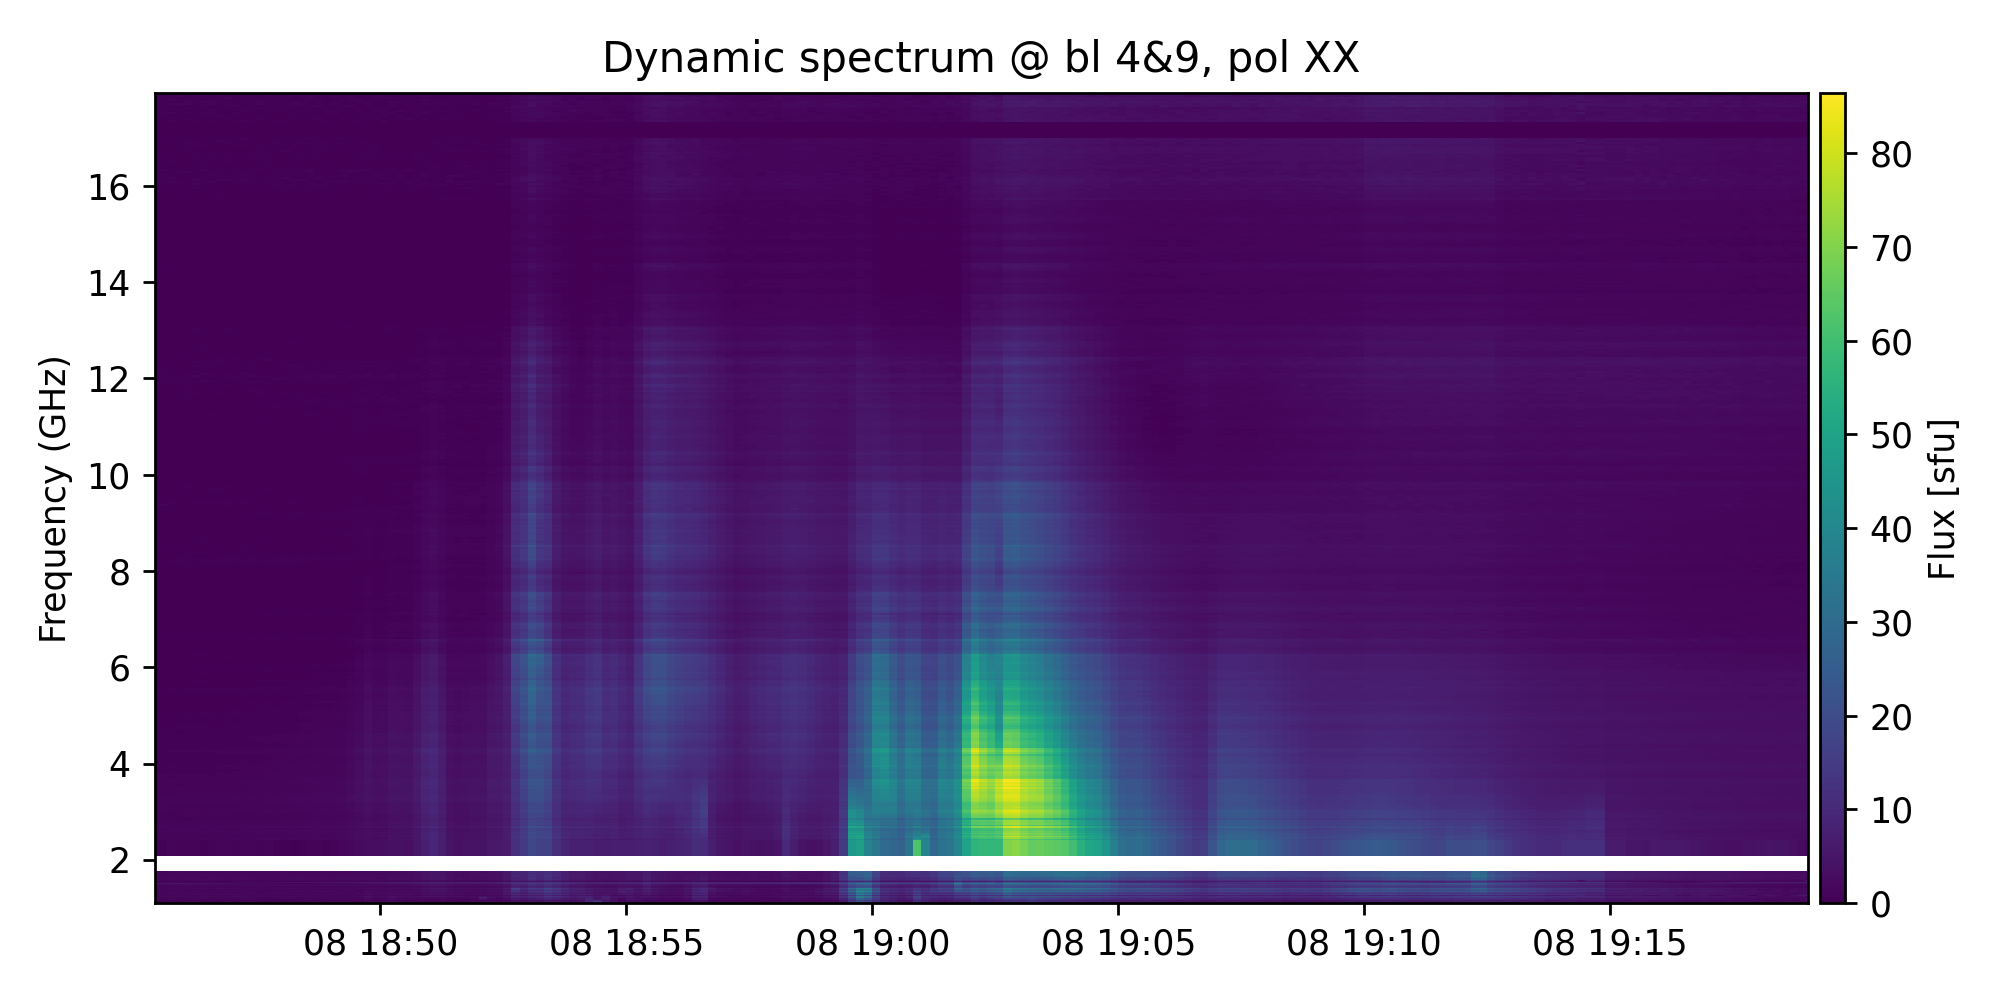

In [41]:
# %matplotlib inline
%matplotlib notebook
from suncasa.utils import dspec as ds
from importlib import reload
reload(ds)
reload(plt)
import time
# The example below shows the cross-power spectrogram from a baseline selected using the parameter "bl"
# bl = '4&9' means selecting a baseline from Antenna ID 4 (Antenna Name "eo05") correlating with Antenna ID 9 (Antenna Name "eo10") - c.f., listobs outputs
specfile = visibility_data + '.dspec.npz'
t0 = time.time()
dspec = ds.get_dspec(vis=visibility_data, bl='4&9',domedian=True, specfile=specfile, usetbtool=True)
t1 = time.time()
print('The dynamic spectrum is generated in {:.1f} second'.format(t1-t0))
ds.plt_dspec(dspec, dmin=None, dmax=None, cmap=plt.get_cmap('viridis'), pol='XX')

# Quick-Look Imaging Example

plot the dynamic spectrum in pol XX
Error in downloading GOES soft X-ray data. Proceeding with out soft X-ray plot.
This is EOVSA data
do clean for 2021/05/07/19:02:00~2021/05/07/19:03:00 in spw 8~12 stokes XX
Original phasecenter: 0.77948273873719790.295749074341333
use phasecenter: J2000 0.7794827387371979rad 0.295749074341333rad
msinfo is derived from: IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms
fits file ./IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.outim.image.pbcor.fits selected
vis IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms imagefile ./IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.outim.image.pbcor timerange 2021/05/07/19:02:00~2021/05/07/19:03:00 reftime  fitsfile ./IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.outim.image.pbcor.fits verbose False overwrite True sclfactor 1.0 toTb True docompress False


'./IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.outim.image.pbcor.fits'

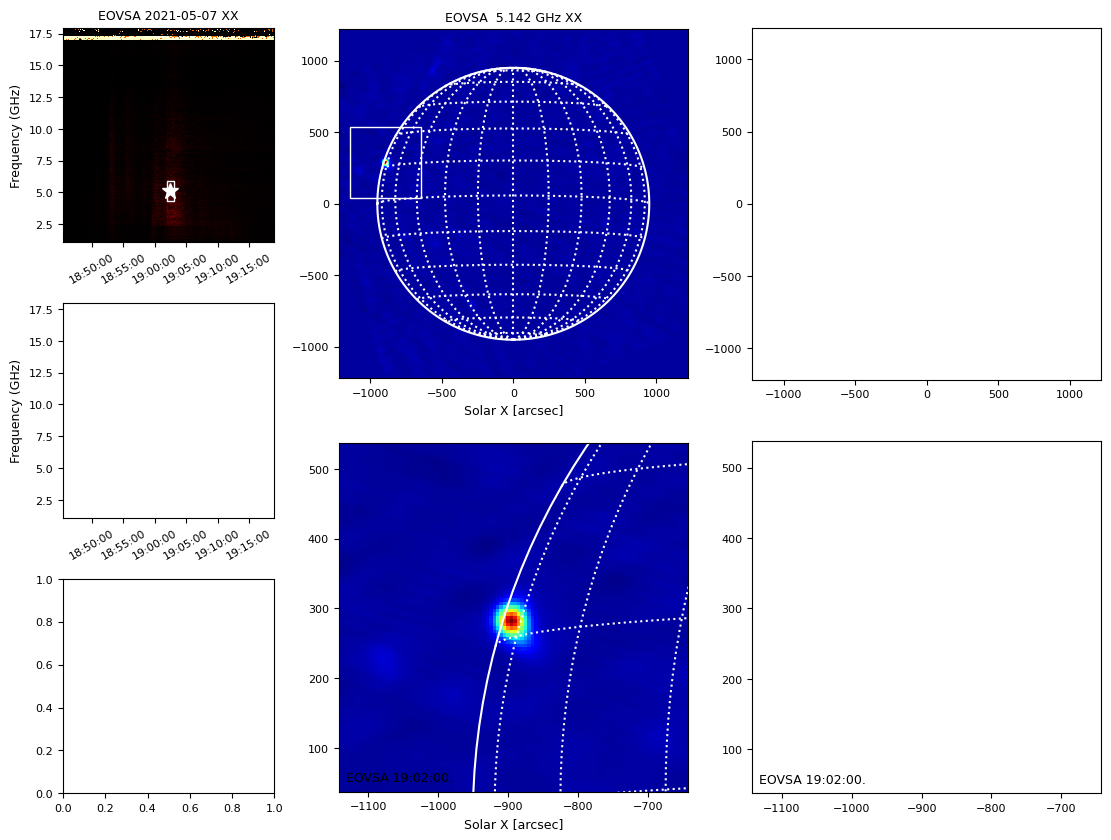

In [25]:
## in SunCASA
from suncasa.utils import qlookplot as ql
## (Optional) Supply the npz file of the dynamic spectrum from previous step.
## If not provided, the program will generate a new one from the visibility.
## set the time interval
timerange = '19:02:00~19:03:00'
## select frequency range from 5 GHz to 6 GHz
spw = '8~12'
## select stokes XX
stokes = 'XX'
## turn off AIA image plotting, default is True
plotaia = False
#visibility_data = 'IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms'
#specfile = 'IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.dspec.npz'
ql.qlookplot(vis=visibility_data, specfile=specfile, timerange=timerange, spw=spw, \
    stokes=stokes, plotaia=plotaia, restoringbeam=['30arcsec'], icmap='jet')